In [1]:
import utils
import plotting
import numpy as np
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

# ignore these because they don't seem to apply
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from PyPDF2 import PdfFileMerger

from copy import deepcopy


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plot_dir = "../../../plots/ttsfs/Nov23"

import os

_ = os.system(f"mkdir -p {plot_dir}")


In [4]:
samples = {
    "QCD": "QCD",
    "Single Top": "ST",
    "TTSL": "TTToSemiLeptonic",
    "TTbar": ["TTTo2L2Nu", "TTToHadronic"],
    "W+Jets": "WJets",
    "Diboson": ["WW", "WZ", "ZZ"],
    "Data": "SingleMuon",
}

top_matched_key = "TT Top Matched"

data_dir = "../../../../data/ttsfs/"
year = "2017"

# filters = [("('ak8FatJetPt', '0')", ">=", 500)]
filters = None

events_dict = utils.load_samples(data_dir, samples, year, filters=filters)


Finding QCD samples
Loading QCD_Pt_3200toInf
Loaded 0 entries
Loading QCD_Pt_1800to2400
Loaded 0 entries
Loading QCD_Pt_2400to3200
Loaded 1 entries
Loading QCD_Pt_1000to1400
Loaded 0 entries
Loading QCD_Pt_600to800
Loaded 0 entries
Loading QCD_Pt_300to470
Loaded 243 entries
Loading QCD_Pt_170to300
Loaded 0 entries
Loading QCD_Pt_800to1000
Loaded 127 entries
Loading QCD_Pt_470to600
Loaded 0 entries
Loading QCD_Pt_1400to1800
Loaded 0 entries
Finding Single Top samples
Loading ST_tW_antitop_5f_NoFullyHadronicDecays
Loaded 7273 entries
Loading ST_tW_top_5f_NoFullyHadronicDecays
Loaded 7422 entries
Loading ST_tW_top_5f_inclusiveDecays
Loaded 2700 entries
Loading ST_tW_antitop_5f_inclusiveDecays
Loaded 2607 entries
Loading ST_s-channel_4f_leptonDecays
Loaded 3309 entries
Finding TTSL samples
Loading TTToSemiLeptonic
Loaded 132878 entries
Loading TTToSemiLeptonic_ext1
Loaded 33194 entries
Finding TTbar samples
Loading TTTo2L2Nu
Loaded 82688 entries
Loading TTToHadronic
Loaded 328 entries
Find

In [5]:
events_dict[top_matched_key] = events_dict["TTSL"].loc[events_dict["TTSL"]["top_matched"][0] == 1]
events_dict["TT W Matched"] = events_dict["TTSL"].loc[events_dict["TTSL"]["w_matched"][0] == 1]
events_dict["TT Unmatched"] = pd.concat(
    [events_dict["TTbar"], events_dict["TTSL"].loc[events_dict["TTSL"]["unmatched"][0] == 1]]
)
# del events_dict["TTSL"]
# del events_dict["TTbar"]


In [6]:
# normalize scale factors to average to 1
mean_lp_sfs = np.mean(events_dict[top_matched_key]["lp_sf"], axis=0)
events_dict[top_matched_key].loc[:, "lp_sf"] = (
    events_dict[top_matched_key].loc[:, "lp_sf"] / mean_lp_sfs
).values


In [ ]:
# for key in events_dict:
#     if key == top_matched_key:
#         events_dict[key]["total_weight"] = events_dict[key]["weight"].values * events_dict[key]["lp_sf"]
#         events_dict[key]["total_weight_err"] = (
#             events_dict[key]["weight"] * events_dict[key]["lp_sf_err"]
#         )
#     else:
#         events_dict[key]["total_weight"] = events_dict[key]["weight"]
#         events_dict[key]["total_weight_err"] = events_dict[key]["weight"] * 0


In [31]:
for key in events_dict:
    events_dict[key] = events_dict[key][events_dict[key]["ak8FatJetPt"][0] >= 500]
    events_dict[key] = events_dict[key][events_dict[key]["ak8FatJetMsd"][0] >= 50]


In [24]:
plot_samples = [
    "QCD",
    "Diboson",
    "Single Top",
    "W+Jets",
    "TT Unmatched",
    "TT W Matched",
    top_matched_key,
]


/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


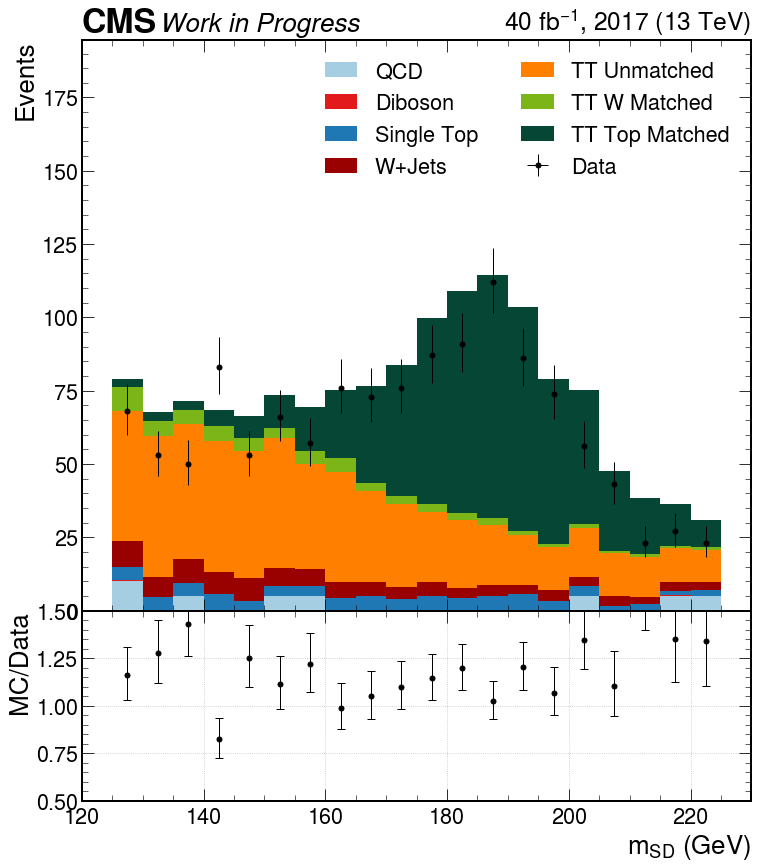

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


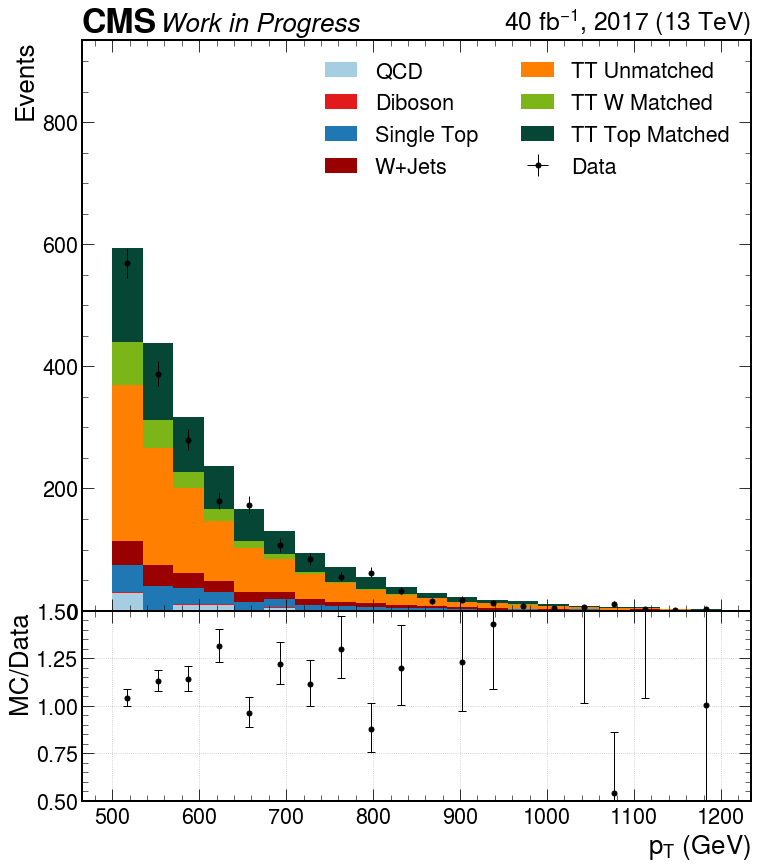

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


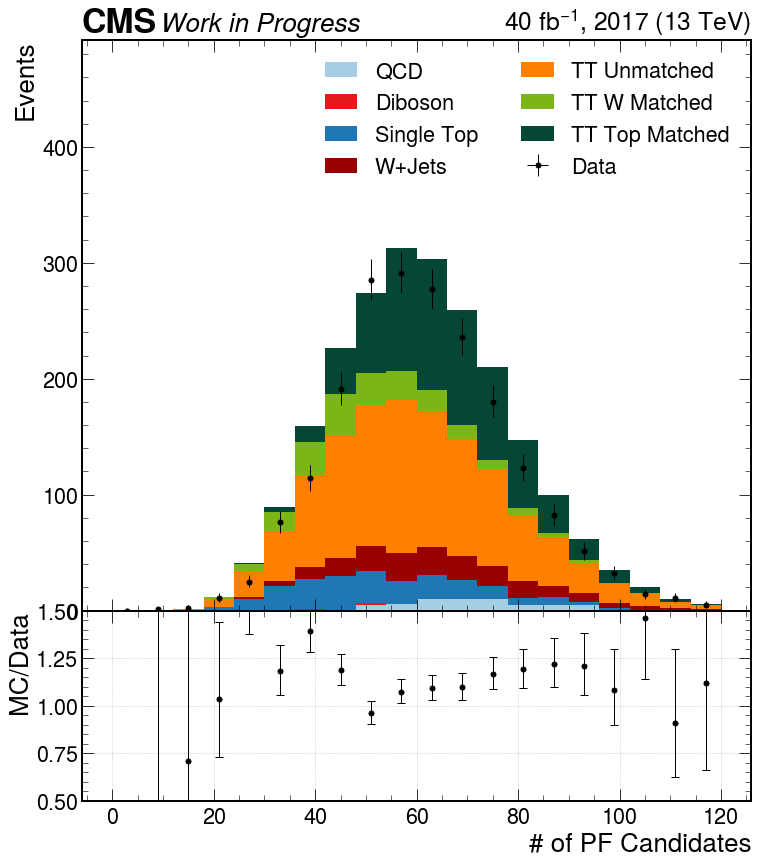

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


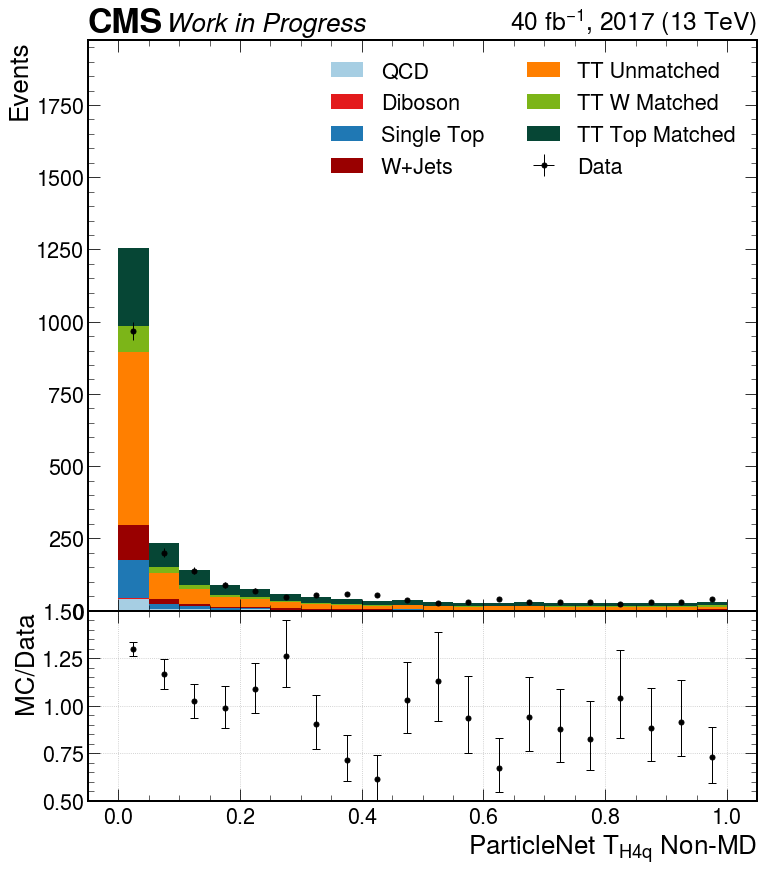

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


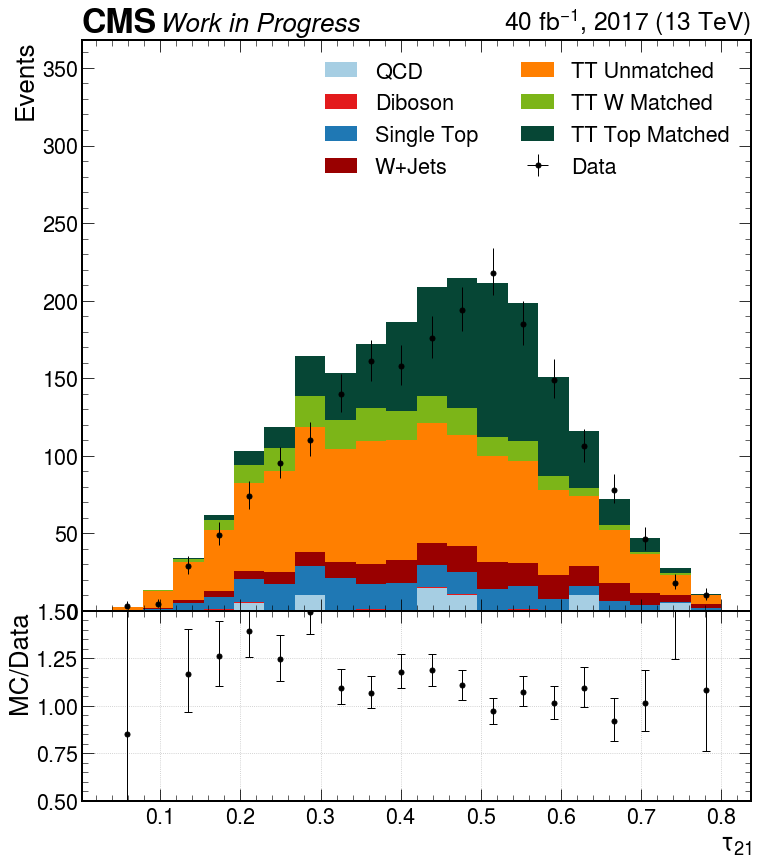

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


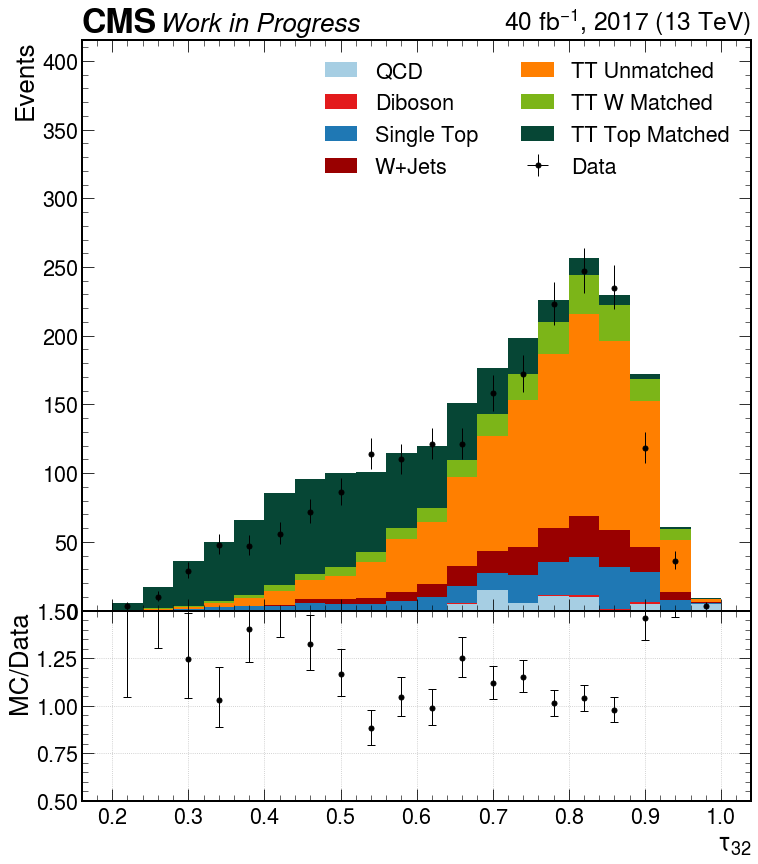

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


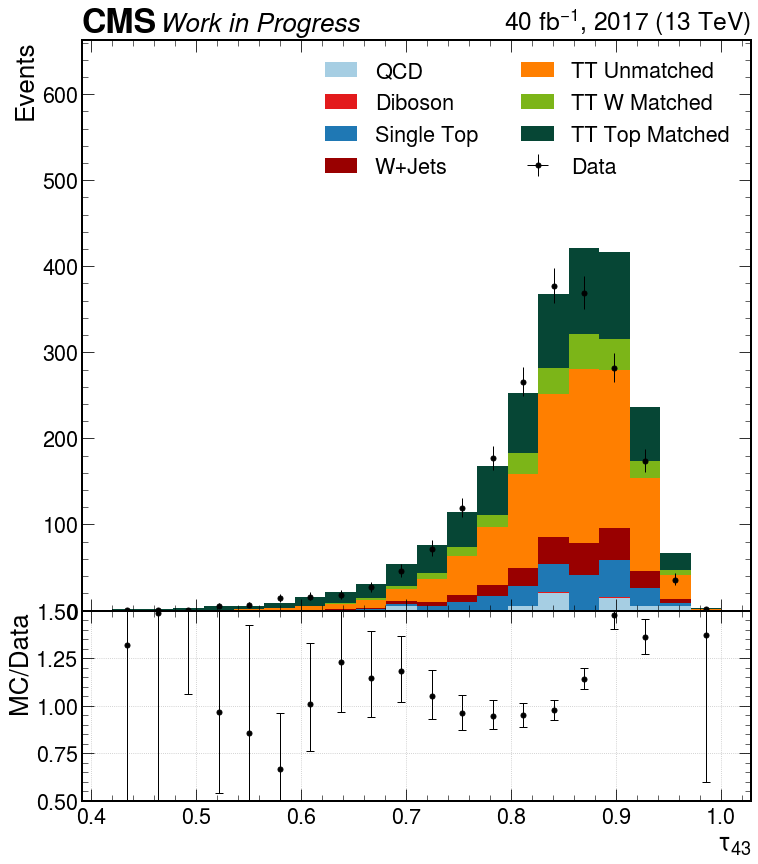

In [32]:
# {var: (bins, label)}
plot_vars = {
    "ak8FatJetMass": ([20, 125, 225], r"$m_{SD}$ (GeV)"),
    "ak8FatJetPt": ([20, 500, 1200], r"$p_T$ (GeV)"),
    "ak8FatJetnPFCands": ([20, 0, 120], r"# of PF Candidates"),
    "ak8FatJetParticleNet_Th4q": ([20, 0, 1], r"ParticleNet $T_{H4q}$ Non-MD"),
    "tau21": ([20, 0.04, 0.8], r"$\tau_{21}$"),
    "tau32": ([20, 0.2, 1], r"$\tau_{32}$"),
    "tau43": ([20, 0.42, 1], r"$\tau_{43}$"),
}

pre_hists = {}

for var, (bins, label) in plot_vars.items():
    if var not in pre_hists:
        pre_hists[var] = utils.singleVarHistNoMask(
            events_dict, var, bins, label, weight_key="weight"
        )

merger_pre_plots = PdfFileMerger()

for var, var_hist in pre_hists.items():
    name = f"{plot_dir}/pre_{var}.pdf"
    plotting.ratioHistPlot(
        var_hist,
        plot_samples,
        name=name,
    )
    merger_pre_plots.append(name)

merger_pre_plots.write(f"{plot_dir}/PrePlots.pdf")
merger_pre_plots.close()


/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


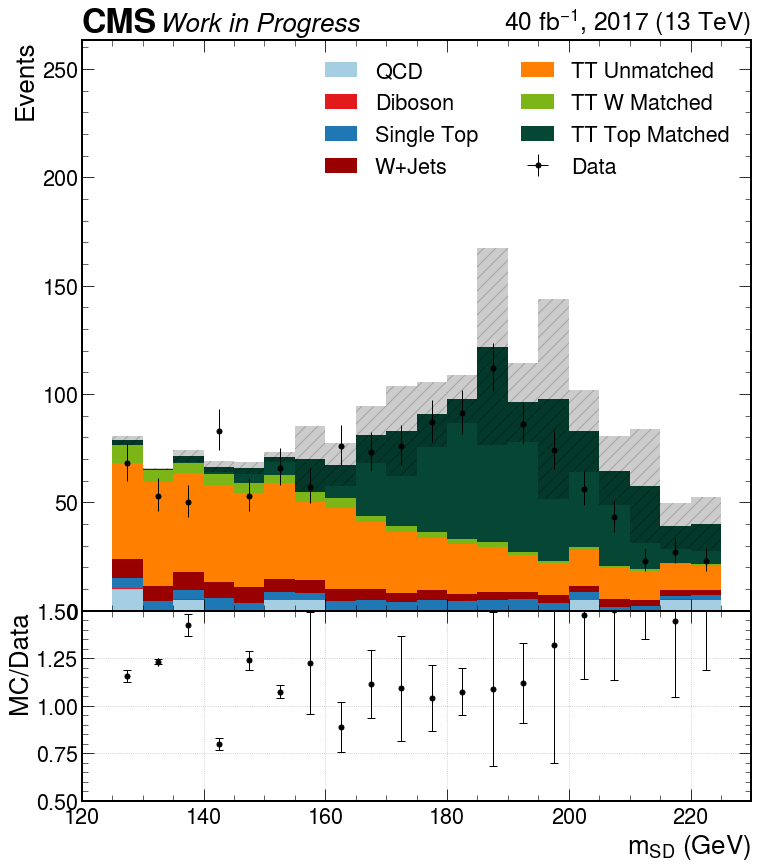

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


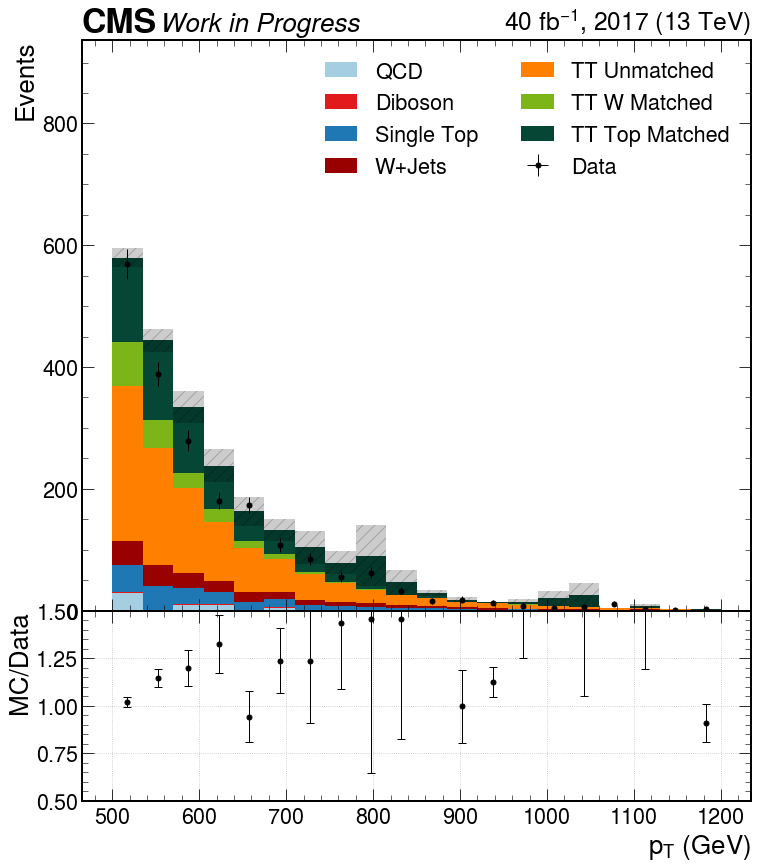

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


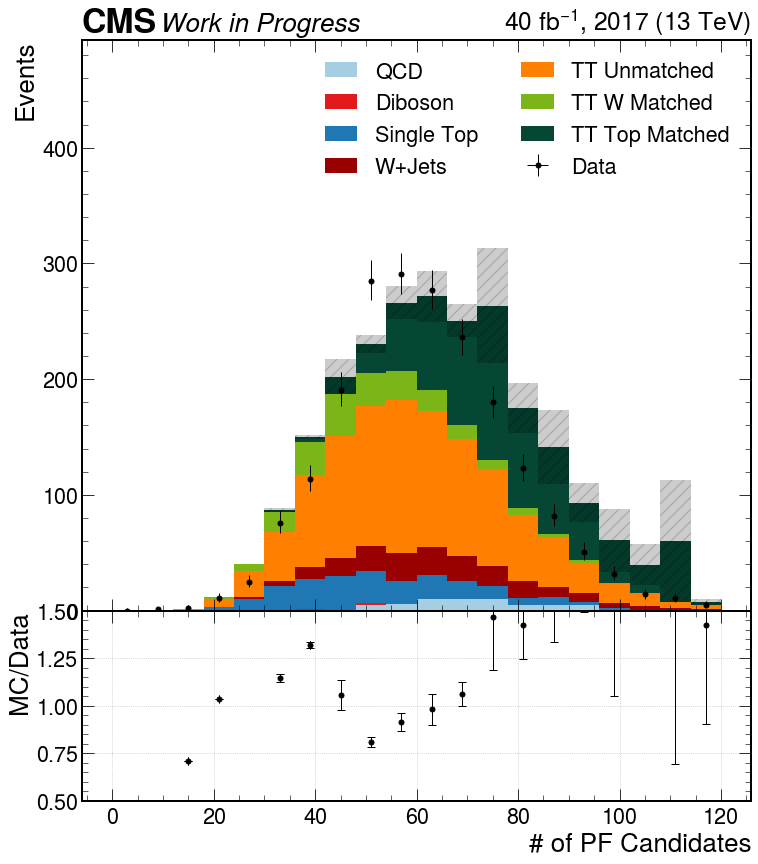

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


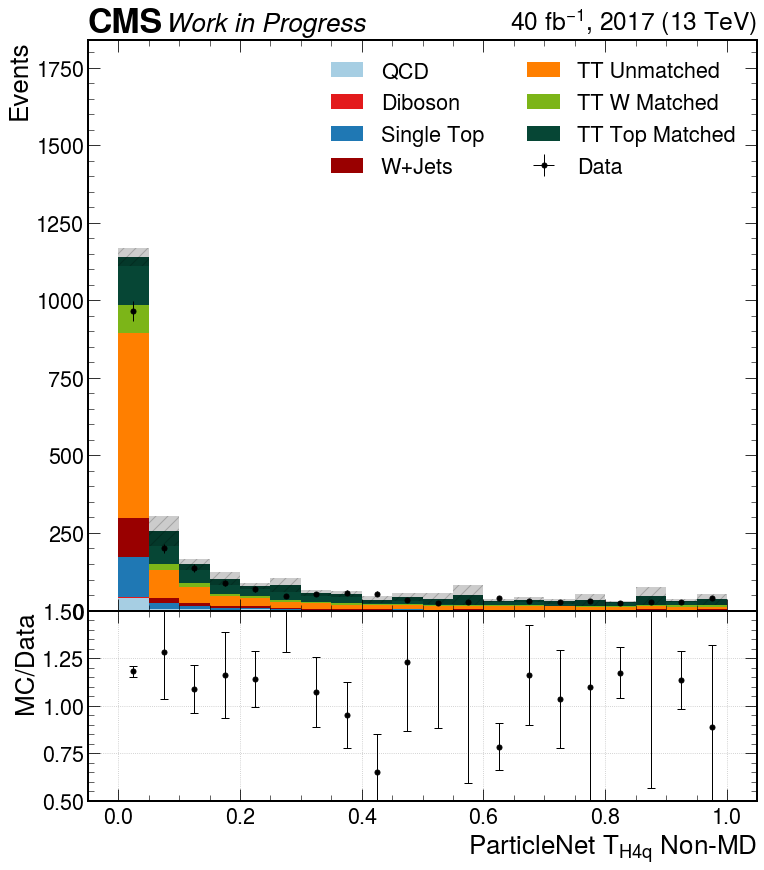

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


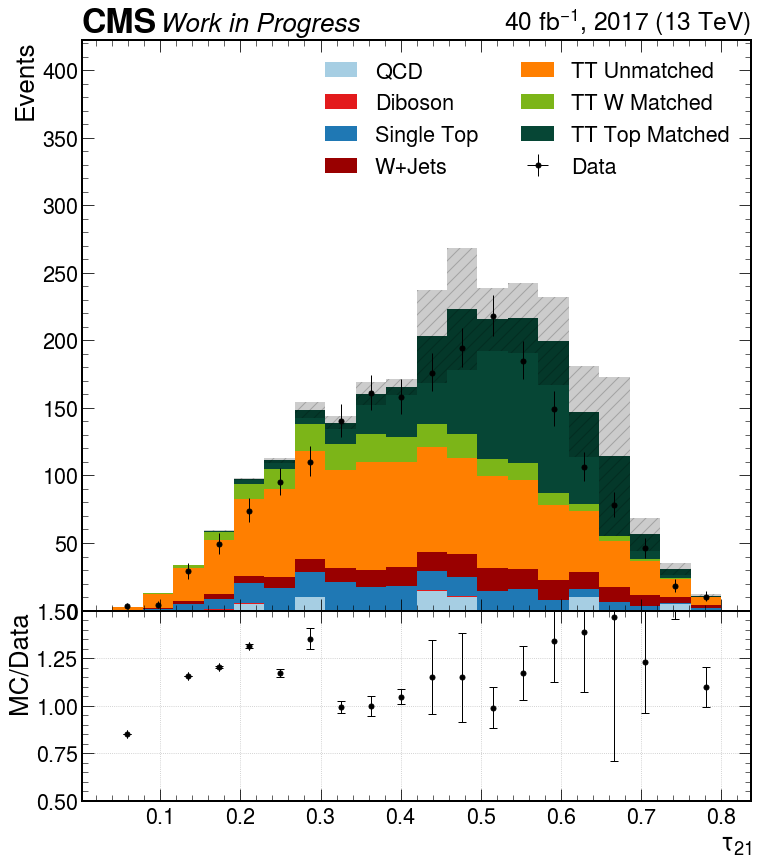

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


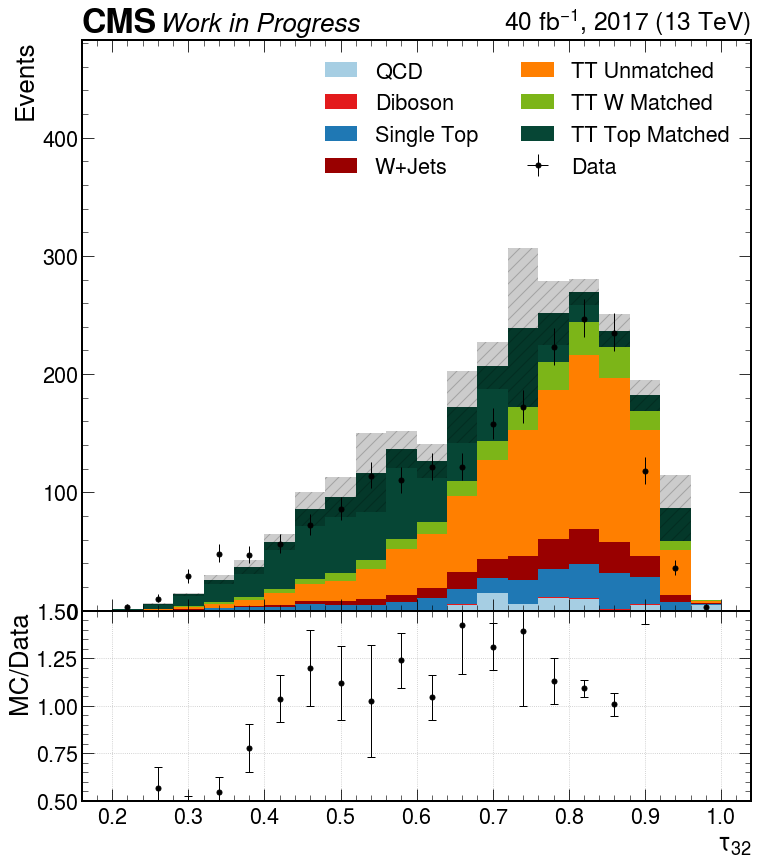

/opt/anaconda3/envs/python310/lib/python3.10/site-packages/boost_histogram/_internal/hist.py:863: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


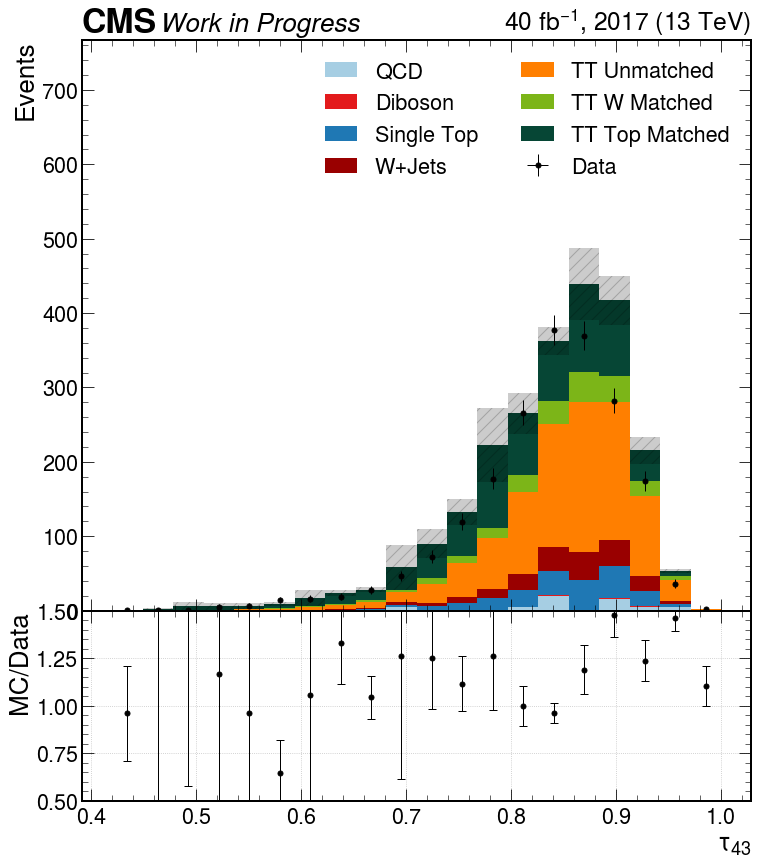

In [33]:
post_hists = {}
post_hists_err = {}

events = events_dict[top_matched_key]
n_sf_toys = events["lp_sf"].shape[1]

for var, (bins, label) in plot_vars.items():
    if var not in post_hists:
        toy_hists = []
        for i in range(n_sf_toys):
            toy_hists.append(
                np.histogram(
                    events[var][0].values.squeeze(),
                    np.linspace(*bins[1:], bins[0] + 1),
                    weights=events["weight"][0].values * events["lp_sf"][i].values,
                )[0]
            )

        nom_vals = np.mean(toy_hists, axis=0)
        unc = np.minimum(nom_vals, np.std(toy_hists, axis=0))  # cap at 100% unc

        thist = deepcopy(pre_hists[var])
        top_matched_key_index = np.where(np.array(list(thist.axes[0])) == top_matched_key)[0][0]
        thist.view(flow=False)[top_matched_key_index, :].value = nom_vals
        post_hists[var] = thist

        post_hists_err[var] = unc


merger_post_plots = PdfFileMerger()

for var, var_hist in post_hists.items():
    name = f"{plot_dir}/post_{var}.pdf"
    plotting.ratioHistPlot(
        var_hist,
        plot_samples,
        bg_err=post_hists_err[var],
        name=name,
    )
    merger_post_plots.append(name)

merger_post_plots.write(f"{plot_dir}/PostPlots.pdf")
merger_post_plots.close()


In [22]:
mass_hist = utils.singleVarHistNoMask(
    events_dict, "ak8FatJetMass", [20, 125, 225], r"$m_{SD}$", weight_key="weight"
)


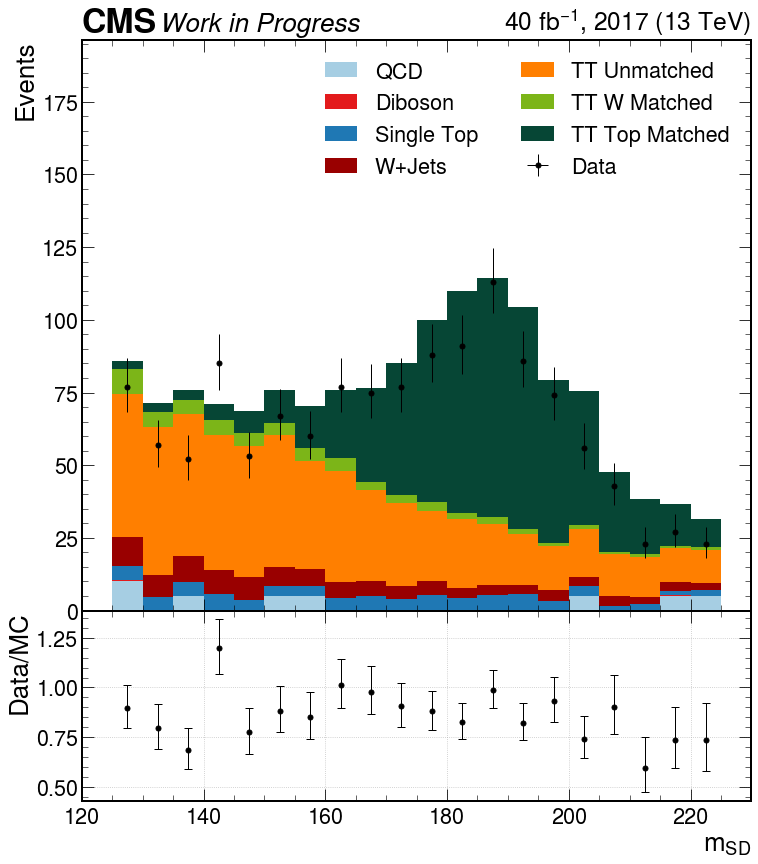

In [26]:
plotting.ratioHistPlot(
    mass_hist,
    ["QCD", "Diboson", "Single Top", "W+Jets", "TT Unmatched", "TT W Matched", top_matched_key],
    f"{plot_dir}/",
)
